## Importing necessary libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualize data correlations

<Axes: >

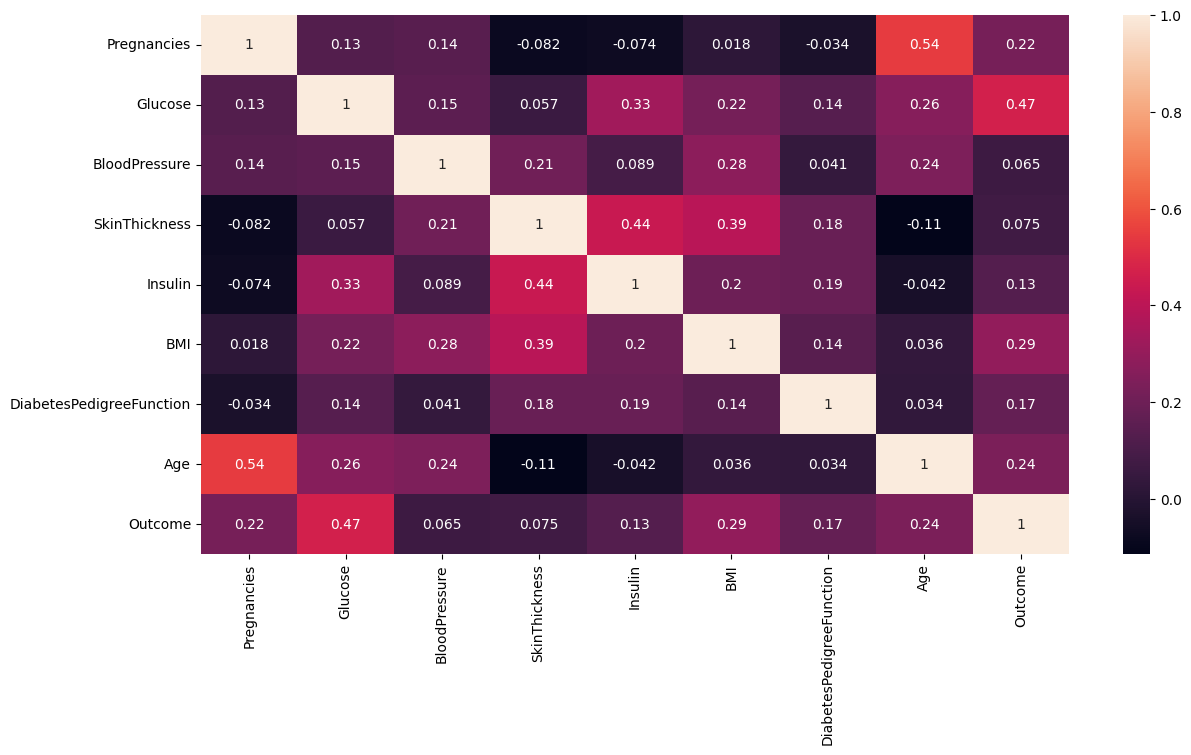

In [19]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Proportion')

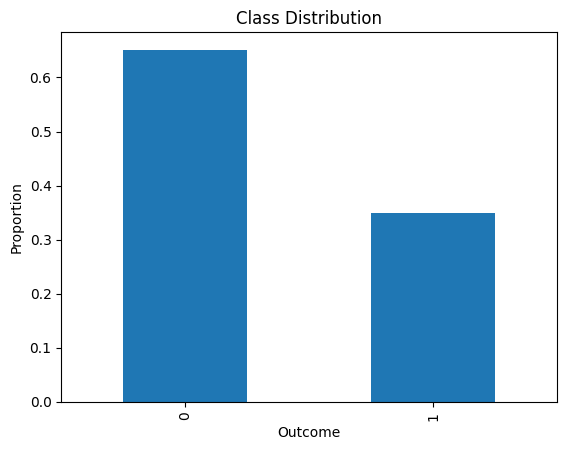

In [20]:
df['Outcome'].value_counts(normalize=True).plot(kind='bar',title='Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Proportion')

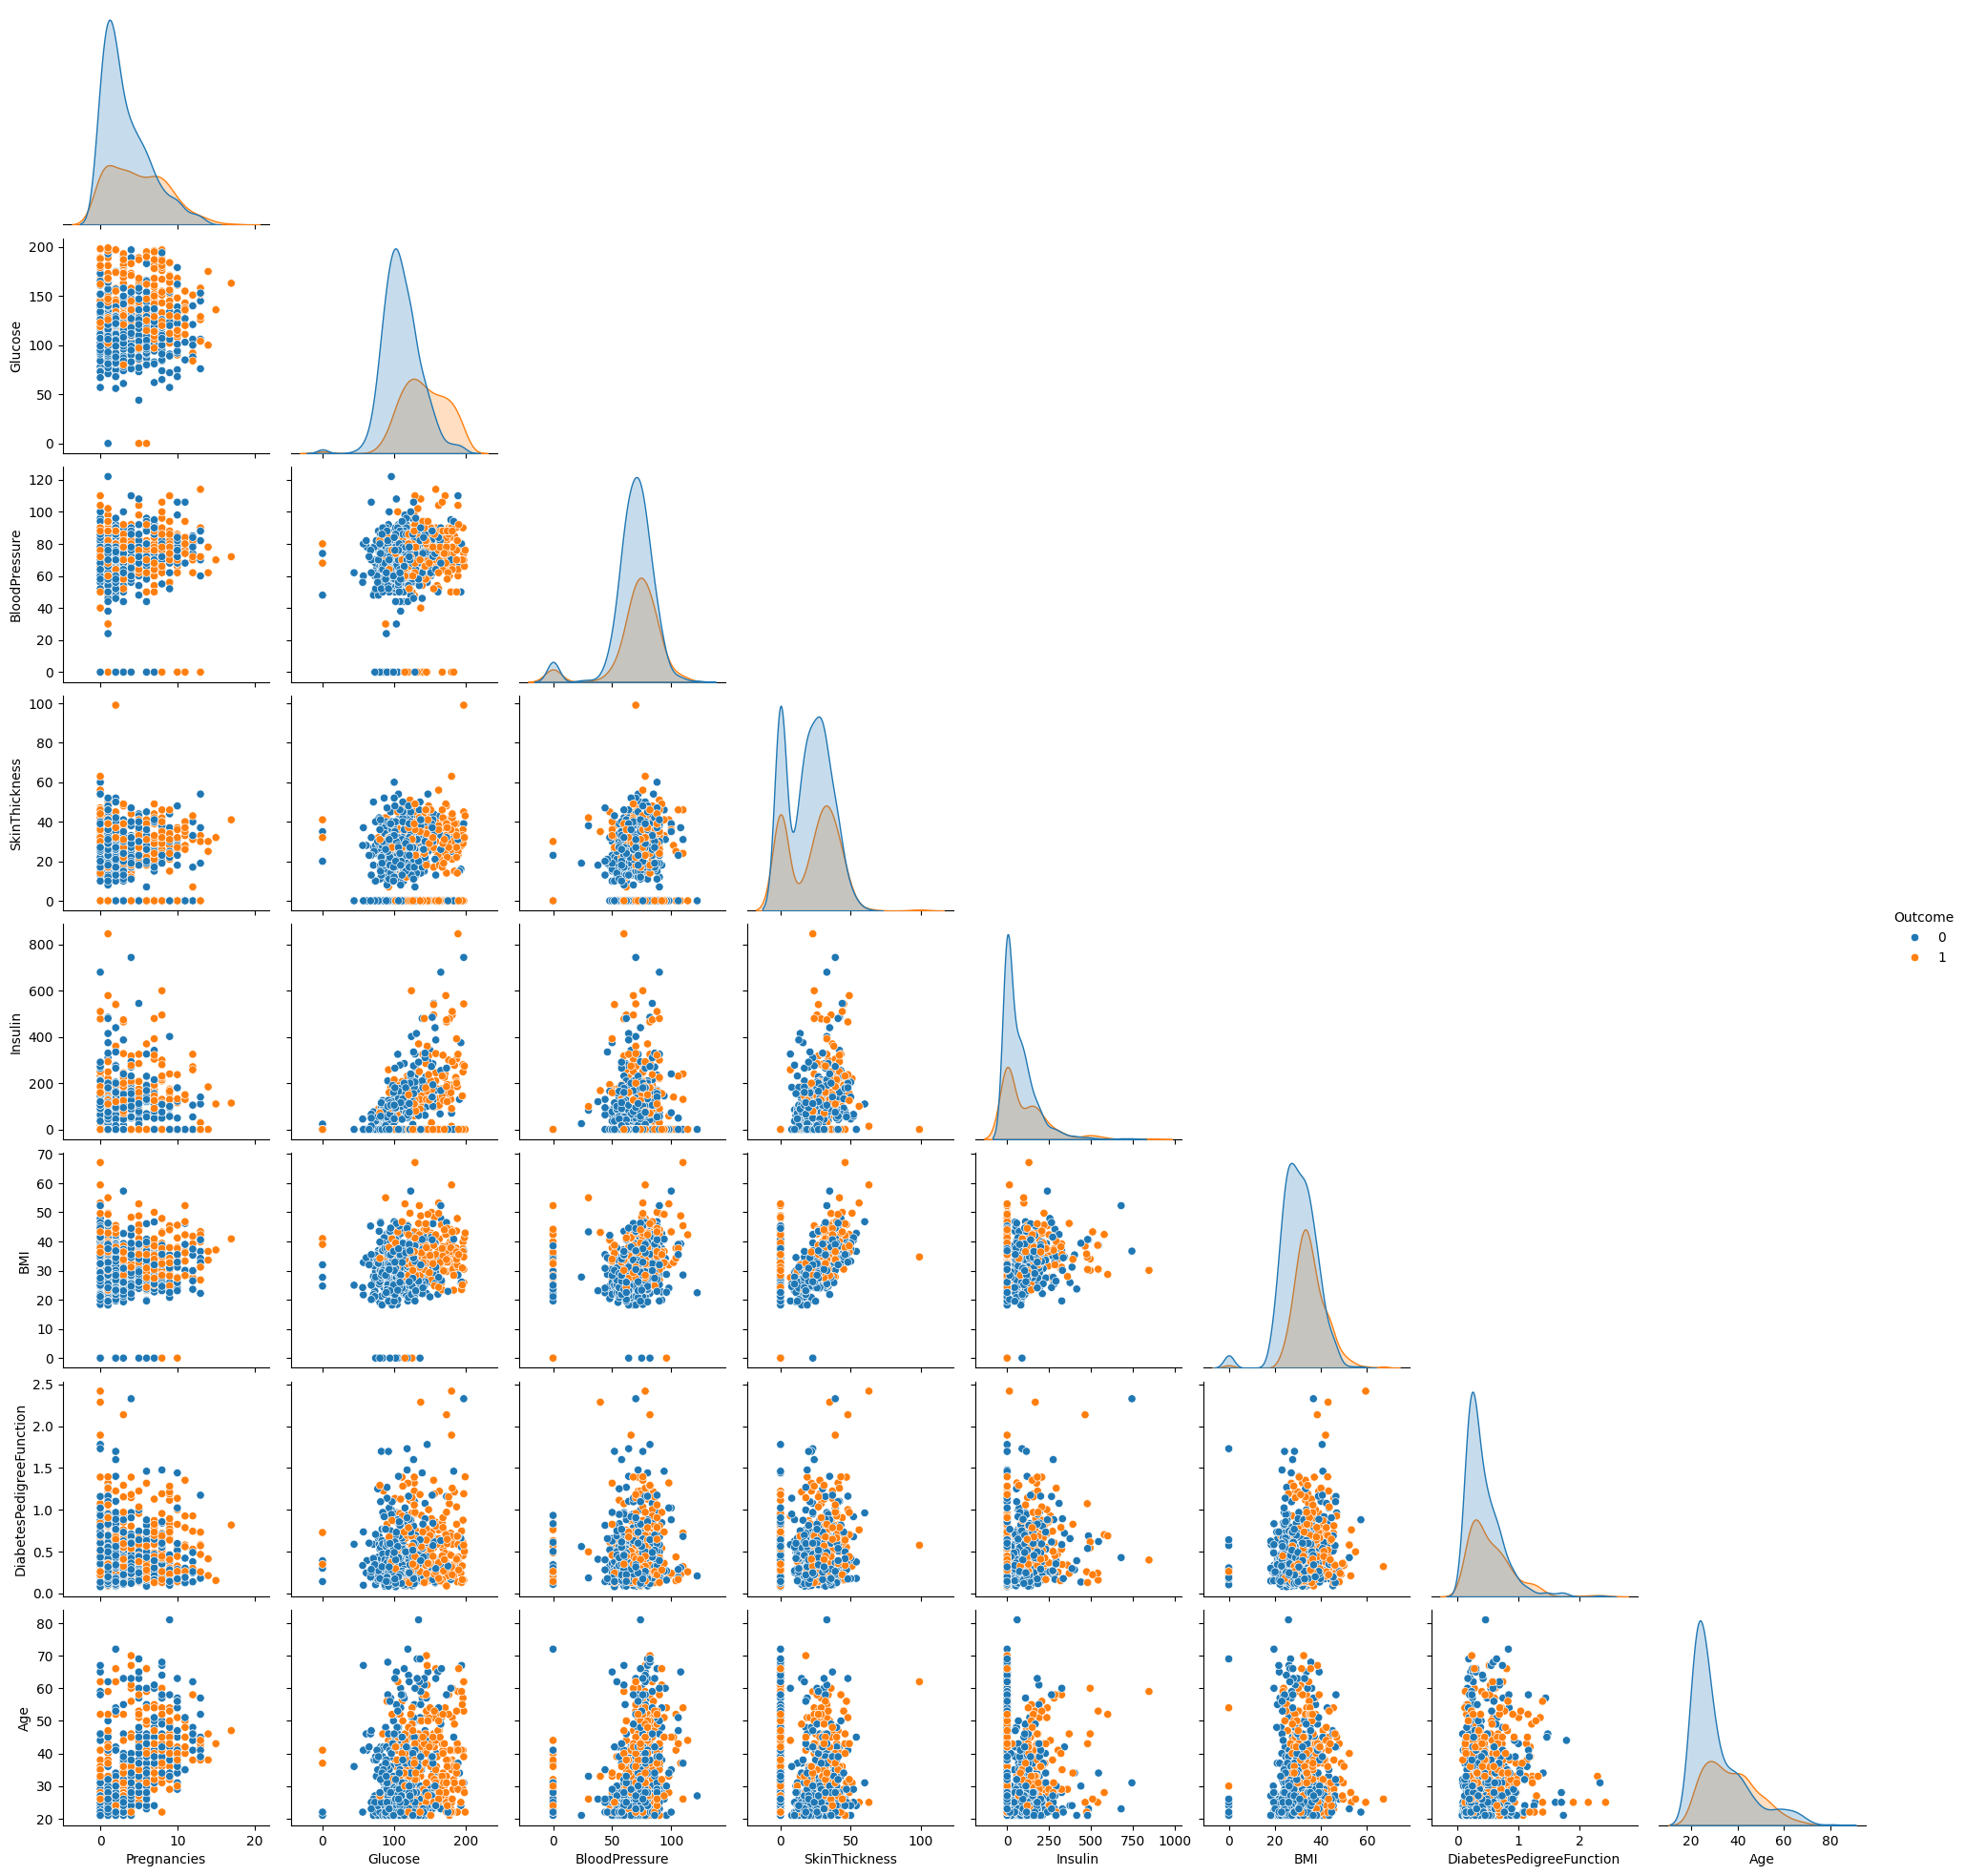

In [21]:
sns.pairplot(df,hue='Outcome',diag_kind='kde', corner=True)

## Explore relationships between features and the target variable

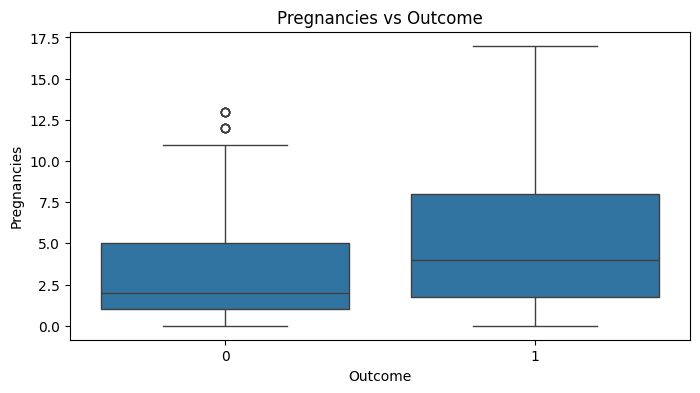

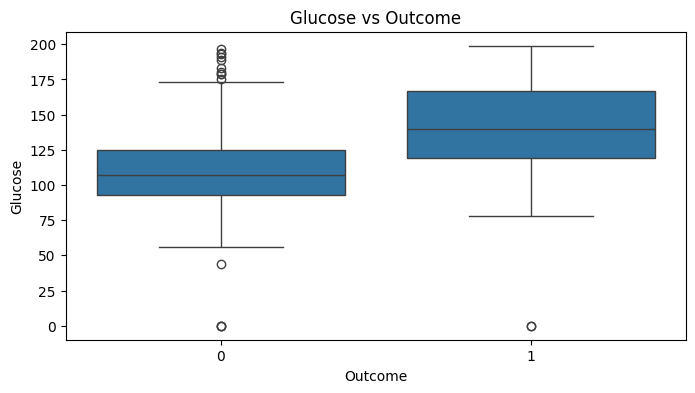

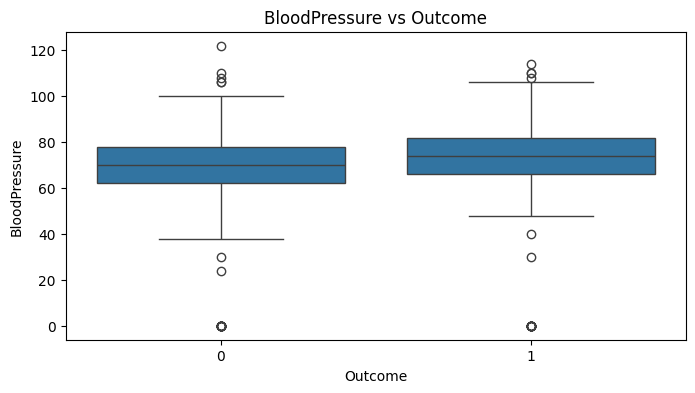

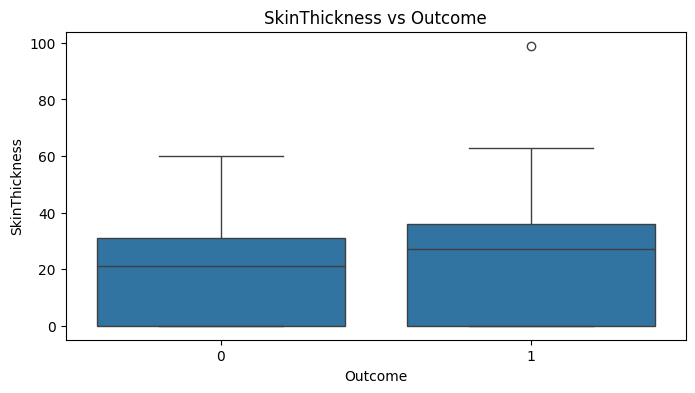

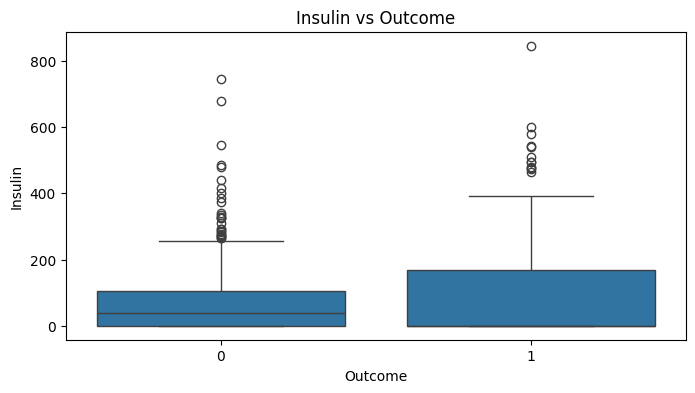

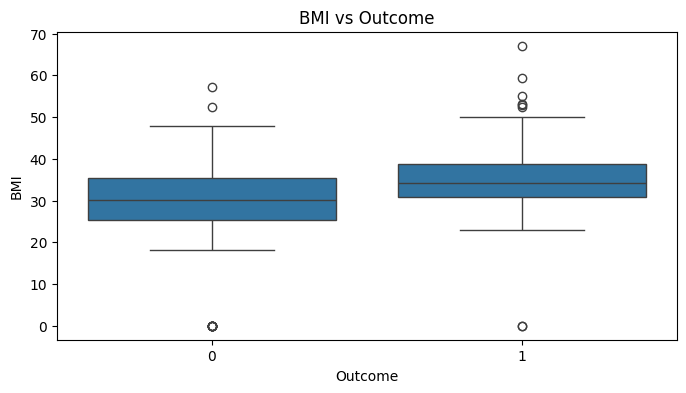

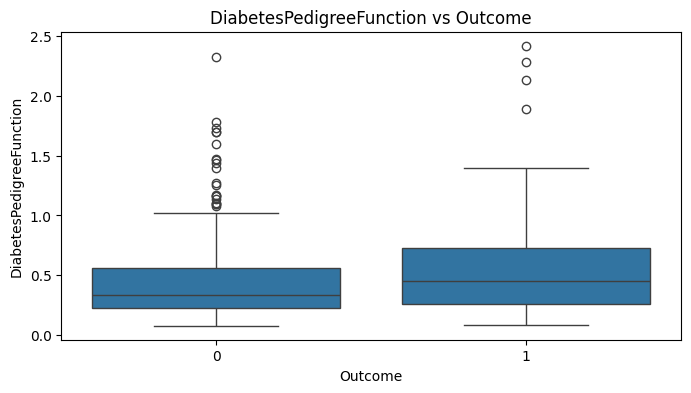

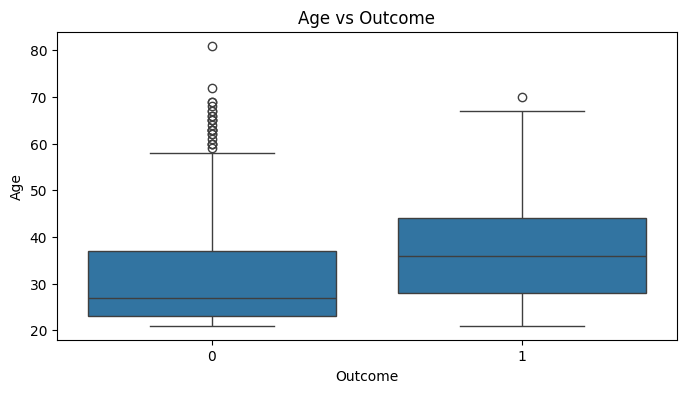

In [22]:
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Outcome', y=column)
    plt.title(f'{column} vs Outcome')
    plt.show()

## Data cleaning and handling missing/erroneous values

In [23]:
df = df[(df['BMI']>0) & (df['Glucose']>0)]
df.shape

(752, 9)

In [25]:
# Ensure the DataFrame is not a view by creating a copy
df = df.copy()
# Ensure the 'Insulin' column is numeric to avoid dtype issues
df['Insulin'] = pd.to_numeric(df['Insulin'], errors='coerce')
# Replace 0 with NaN in the 'Insulin' column
df.loc[:, 'Insulin'] = df['Insulin'].replace(0, np.nan)
# Calculate the median and fill missing values in 'Insulin'
median_insulin = df['Insulin'].median()
df.loc[:, 'Insulin'] = df['Insulin'].fillna(median_insulin)

## Splitting the data

In [26]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_cv.shape)
print(y_cv.shape)
print(x_test.shape)
print(y_test.shape)

(451, 8)
(451,)
(150, 8)
(150,)
(151, 8)
(151,)


## Standardize the features for better model performance

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

## Build and evaluate a Logistic Regression model

In [29]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [30]:
train_accuracy = lr_model.score(x_train, y_train)
print('Training Accuracy:', train_accuracy)

cv_accuracy = lr_model.score(x_cv, y_cv)
print('Cross-Validation Accuracy:', cv_accuracy)

Training Accuracy: 0.7782705099778271
Cross-Validation Accuracy: 0.7533333333333333


## add polynomial features to avoid high bias(underfitting)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_cv_poly = poly.transform(x_cv)
x_test_poly = poly.transform(x_test)

lr_model_poly = LogisticRegression(C=0.2, max_iter=200)
lr_model_poly.fit(x_train_poly, y_train)

train_accuracy_poly = lr_model_poly.score(x_train_poly, y_train)
cv_accuracy_poly = lr_model_poly.score(x_cv_poly, y_cv)

print("Training Accuracy (Polynomial Features):", train_accuracy_poly)
print("Cross-Validation Accuracy (Polynomial Features):", cv_accuracy_poly)

Training Accuracy (Polynomial Features): 0.8248337028824834
Cross-Validation Accuracy (Polynomial Features): 0.78


In [32]:
test_accuracy = lr_model_poly.score(x_test_poly, y_test)
print("Test Accuracy (Polynomial Features with Regularization):", test_accuracy)

Test Accuracy (Polynomial Features with Regularization): 0.7549668874172185


### logistic regression does not yield further improvements, consider trying more complex models such as: Random Forest, Gradient Boosting

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced')


rf_model.fit(x_train, y_train)
train_accuracy_rf = rf_model.score(x_train, y_train)
cv_accuracy_rf = rf_model.score(x_cv, y_cv)

print("Random Forest Training Accuracy:", train_accuracy_rf)
print("Random Forest Cross-Validation Accuracy:", cv_accuracy_rf)

Random Forest Training Accuracy: 0.8470066518847007
Random Forest Cross-Validation Accuracy: 0.78


In [34]:
test_accuracy_rf = rf_model.score(x_test, y_test)
print("Random Forest Test Accuracy:", test_accuracy_rf)

Random Forest Test Accuracy: 0.7682119205298014


## Build and evaluate an XGBoost Classifier

In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

xgb_model.fit(x_train, y_train)

train_accuracy_xgb = xgb_model.score(x_train, y_train)
cv_accuracy_xgb = xgb_model.score(x_cv, y_cv)

print("XGBoost Training Accuracy:", train_accuracy_xgb)
print("XGBoost Cross-Validation Accuracy:", cv_accuracy_xgb)

XGBoost Training Accuracy: 0.8669623059866962
XGBoost Cross-Validation Accuracy: 0.7733333333333333


In [36]:
test_accuracy_xgb = xgb_model.score(x_test, y_test)
print("XGBoost Test Accuracy:", test_accuracy_xgb)

XGBoost Test Accuracy: 0.8145695364238411


## Evaluate models using classification reports and ROC-AUC scores

In [37]:
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression Prediction
y_pred_lr = lr_model.predict(x_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))

# Random Forest Prediction
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

# XGBoost Prediction
y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        95
           1       0.80      0.62      0.70        56

    accuracy                           0.80       151
   macro avg       0.80      0.77      0.78       151
weighted avg       0.80      0.80      0.80       151

Logistic Regression ROC-AUC Score: 0.7651315789473684
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        95
           1       0.65      0.80      0.72        56

    accuracy                           0.77       151
   macro avg       0.76      0.78      0.76       151
weighted avg       0.79      0.77      0.77       151

Random Forest ROC-AUC Score: 0.77546992481203
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        95
           1       0.77   

## So, xgboost is the best model in this dataset with Test Accuracy: 81%.